### Projet 1 
Groupe 3

Mathieu Muty - MUTM22090200

Gabrielle Walgraef - WALG13580100

Mamoudou Camara - CAMM12080206

In [1]:
# importation des libraries
import numpy as np
import pandas as pd

In [2]:
# chargement des fichiers csv
environnement = pd.read_csv('./data_projet/environnement.csv')
genre = pd.read_csv('./data_projet/genre.csv')
meteo = pd.read_csv('./data_projet/meteo.csv')
propulation = pd.read_csv('./data_projet/population.csv')
surface = pd.read_csv('./data_projet/surface.csv')
rapport = pd.read_excel('./data_projet/rapports-accident-2021.xlsx')

## Question 1
Les fichiers suivants : environnement, genre, meteo, population ainsi que surface ne contiennent pas de valeur
aberrante puisque ces fichiers nous donne les codes pour mieux comprendre le fichier excel 'rapport-accident-2021'

Nous nous concentrons donc sur le fichier 'rapports-accident-2021.xlsx' afin de déceler les valeurs extrêmes 
ou aberrantes

In [9]:
print(rapport.isna().sum())

print("type de donnée de la colonne CD_GENRE_ACCDN :", rapport['CD_GENRE_ACCDN'].dtype)
print("type de donnée de la colonne CD_GENRE_ACCDN :", rapport['MRC'].dtype)
print("nombre de valeur du dataframe : ", len(rapport))

DT_ACCDN                          0
HR_ACCDN                          0
GENRE_CONDUCTEUR                  0
AGE_CONDUCTEUR                    0
gravite                           0
VALEURS_DOMMAGES                  0
NB_MORTS                          0
NB_BLESSES_GRAVES                 0
NB_BLESSES_LEGERS                 0
NB_VEH_IMPLIQUES_ACCDN            0
NB_DECES_PIETON                   0
NB_BLESSES_PIETON                 0
NB_VICTIMES_PIETON                0
NB_DECES_MOTO                     0
NB_BLESSES_MOTO                   0
NB_VICTIMES_MOTO                  0
NB_DECES_VELO                     0
NB_BLESSES_VELO                   0
NB_VICTIMES_VELO                  0
REG_ADM                          15
MRC                              15
VITESSE_AUTOR                  9310
CD_GENRE_ACCDN                  798
CD_ETAT_SURFC                  1163
CD_ECLRM                       1415
CD_ENVRN_ACCDN                 1239
CD_COND_METEO                  1352
nb_automobile_camion_leger  

## Démarche par rapport aux valeurs manquantes
Après identification des colonnes utilisées dans les prochaines questions et qui contiennent des valeurs manquantes,
Nous avons remarqué que ce cas de figure se retrouve dans la question 5 et la question 6

#### Cas de la question 5 :
Dans la question 5 nous utilisons la colonne **'CD_GENRE_ACCDN'** qui contient **798** valeurs manquantes.
Cette colonne nous indique un code **numérique** qui correspond au genre de l'accident.

Après étude de la question 5, qui incorpore des pourcentages a réaliser, nous avons décidé de supprimer ces valeurs manquantes pour le traitement de cette question même si ce nombre n'est pas significatif par rapport à la taille du dataFrame.


#### Cas de la question 6:
Dans la question 6 nous utilisons la colone **MRC** qui contient **15** valeurs manquantes. 
Après étude de la question 6, nous avons décidé de les supprimer afin de créer le dataframe **agg_tx_acc** sans erreur potentielle, de plus la suppression de ces valeurs n'a aucune incidence sur la question puisque nous devons sélectionner uniquement les 5 **MRC** avec le plus haut taux d'accident global.

## Question 2

In [3]:
#On met les dates de congés dans conges feries
conges_feries = [
    "2021-01-01",
    "2021-04-02",
    "2021-05-24",
    "2021-06-24",
    "2021-07-01",
    "2021-09-06",
    "2021-10-11",
    "2021-12-25"
]
#Conversion de la colonne de date au format datetime pour avoir AAAA-MM-JJ
rapport['DT_ACCDN'] = pd.to_datetime(rapport['DT_ACCDN'], format='%Y-%m-%d')

#Initialisons la variable EstCongéFérié comme si il correspond a aucune date feriée
rapport['EstCongéFérié'] = False

#On parcourt chaque ligne de la DataFrame pour voir une correspondance avec les jours feriés
#Puis dans le cas ou il y'a une correspondace, on met EstCongéFerié a True 
for index, row in rapport.iterrows():
    date_accident = row['DT_ACCDN'].strftime('%Y-%m-%d')
    if date_accident in conges_feries:
        rapport.at[index, 'EstCongéFérié'] = True
rapport[rapport['EstCongéFérié'] == True]

,DT_ACCDN,HR_ACCDN,GENRE_CONDUCTEUR,AGE_CONDUCTEUR,gravite,VALEURS_DOMMAGES,NB_MORTS,NB_BLESSES_GRAVES,NB_BLESSES_LEGERS,NB_VEH_IMPLIQUES_ACCDN,...,nb_bicyclette,nb_cyclomoteur,nb_motocyclette,nb_taxi,nb_urgence,nb_motoneige,nb_VHR,nb_autres_types,nb_veh_non_precise,EstCongéFérié
150,2021-05-24,12:00:00-12:59:00,H,31,Dommages matériels seulement,10068.018863,0,0,0,2,...,0,0,0,0,0,0,0,0,0,True
192,2021-06-24,13:00:00-13:59:00,H,56,Dommages matériels inférieurs au seuil de rapp...,2764.079837,0,0,0,2,...,0,0,0,0,0,0,0,0,0,True
207,2021-07-01,05:00:00-05:59:00,F,19,Dommages matériels seulement,9844.460065,0,0,0,1,...,0,0,0,0,0,0,0,0,0,True
208,2021-07-01,10:00:00-10:59:00,F,29,Léger,9213.429737,0,0,2,3,...,2,0,0,0,0,0,0,0,0,True
209,2021-07-01,12:00:00-12:59:00,F,68,Dommages matériels inférieurs au seuil de rapp...,2191.412262,0,0,0,2,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100164,2021-07-01,16:00:00-16:59:00,F,63,Dommages matériels inférieurs au seuil de rapp...,3138.237014,0,0,0,1,...,0,0,1,0,0,0,0,0,0,True
100269,2021-09-06,15:00:00-15:59:00,H,45,Dommages matériels inférieurs au seuil de rapp...,3074.957276,0,0,0,2,...,0,0,0,0,0,0,0,0,0,True
100468,2021-12-25,02:00:00-02:59:00,H,24,Dommages matériels seulement,9911.888705,0,0,0,1,...,0,0,0,0,0,0,0,0,0,True
100469,2021-12-25,14:00:00-14:59:00,F,37,Dommages matériels seulement,10058.105165,0,0,0,1,...,0,0,0,0,0,0,0,0,0,True


## Question 3

In [4]:
rapport['EstWeekEnd'] = (rapport['DT_ACCDN'].dt.weekday >= 5)
rapport['EstWeekEnd']

0          True
1         False
2          True
3         False
4         False
          ...  
100514    False
100515    False
100516    False
100517     True
100518     True
Name: EstWeekEnd, Length: 100519, dtype: bool

## Question 4

Ici il n'y a pas de tri fait sur les valeurs manquantes car les analyses sont effectuées sur le total des accidents en fonction de leurs nombres de morts. Comme vérifié à la question 1, aucune valeurs ne sont manquantes dans les données utilisées.

In [5]:
"""
Fonction pour calculer du taux de mortalité en fonction du nombre d'accident et 
du total d'accident arrondit à la 2ème décimale
"""

def calcul_mortality_tx(nb_accdn, total_accdn):
    tx = (nb_accdn / total_accdn) * 100
    return round(tx, 2)



heavy_accdn_mask = (rapport['NB_BLESSES_GRAVES'] > 0) & (rapport['NB_VICTIMES_PIETON'] == 0) & (rapport['NB_VICTIMES_MOTO'] == 0) & (rapport['NB_VICTIMES_VELO'] == 0)
light_accdn_mask = (rapport['NB_BLESSES_LEGERS'] > 0) & (rapport['NB_VICTIMES_PIETON'] == 0) & (rapport['NB_VICTIMES_MOTO'] == 0) & (rapport['NB_VICTIMES_VELO'] == 0)
total_accdn_vehicule = len(rapport[heavy_accdn_mask]) + len(rapport[light_accdn_mask])

# Récupération du total d'accident par type d'utilisateur de la route impliqué
total_accdn = {
    "Véhicule" : total_accdn_vehicule, 
    "Piéton": rapport['NB_VICTIMES_PIETON'].sum(),
    "Moto": rapport['NB_VICTIMES_MOTO'].sum(),
    "Cycliste": rapport['NB_VICTIMES_VELO'].sum()
}

"""
mask afin de récupérer uniquement les accidents avec des morts issue d'un accident de voiture uniquement.
Autrement dit, ici, nous récupérons uniquement les accidents qui sont mortel avec des victimes qui ne sont
ni des piétons, ni des motards, ni des cyclistes.
"""
mask = (rapport['gravite'] == 'Mortel') & (rapport['NB_DECES_PIETON'] == 0) & (rapport['NB_DECES_MOTO'] == 0) & (rapport['NB_DECES_VELO'] == 0)

# création du premier dictionnaire afin de créer les catégories demandé et de leur assigner leurs valeurs
nb_accdn_mortel = {
    "Véhicule" : rapport[mask]['NB_MORTS'].sum(),
    "Piéton": rapport['NB_DECES_PIETON'].sum(),
    "Moto": rapport['NB_DECES_MOTO'].sum(),
    "Cycliste": rapport['NB_DECES_VELO'].sum()
}

# création du deuxième dictionnaire afin de caluler les taux de mortalités
tx_accdn_mortel = {
    "Véhicule": str(calcul_mortality_tx(nb_accdn_mortel['Véhicule'], total_accdn['Véhicule'])) + '%',
    "Piéton": str(calcul_mortality_tx(nb_accdn_mortel['Piéton'], total_accdn['Piéton'])) + '%',
    "Moto": str(calcul_mortality_tx(nb_accdn_mortel['Moto'], total_accdn['Moto'])) + '%',
    "Cycliste": str(calcul_mortality_tx(nb_accdn_mortel['Cycliste'], total_accdn['Cycliste'])) + '%'
}

tx_serie = pd.Series(tx_accdn_mortel)
tx_mortalité = pd.DataFrame({'Taux de mortalité': tx_serie})
tx_mortalité

,Taux de mortalité
Véhicule,1.25%
Piéton,2.52%
Moto,3.85%
Cycliste,1.1%


## Question 5

In [6]:
mask = rapport['CD_GENRE_ACCDN'].isna()
data = rapport.drop(rapport[mask].index, axis=0)

#creation d'un dictionnaire pour la traduction des mois en français
anglais_francais_mois = {
    'January': 'Janvier',
    'February': 'Février',
    'March': 'Mars',
    'April': 'Avril',
    'May': 'Mai',
    'June': 'Juin',
    'July': 'Juillet',
    'August': 'Août',
    'September': 'Septembre',
    'October': 'Octobre',
    'November': 'Novembre',
    'December': 'Décembre'
}

#creation d'une liste me permettant de mettre les mois dans l'ordre chronologique
chrono_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# création d'une colonne mois avec l'aide du dictionnaire pour traduire les noms des mois de l'anglais au français et de la liste pour l'ordre chronologique
data['Mois'] = pd.Categorical(data['DT_ACCDN'].dt.strftime('%B').map(anglais_francais_mois), categories=chrono_order)

#fonction qui permet de catégoriser les genres d'accidents grâce au code
def categoriser_genre_accident(code):
    if 31 <= code <= 39:
        return 'Collision'
    elif 40 <= code <= 55 or code == 59:
        return 'Objet fixe'
    elif 71 <= code <= 75 or code == 99:
        return 'Sans collision'


#creation d'une colonne genre accident grâce a la fonction permettant de catégoriser pour les genres d'accidents en l'apliquant sur la colone CD GENRE ACCDN
data['Genre_accident'] = data['CD_GENRE_ACCDN'].apply(categoriser_genre_accident)
# groupe les données par mois et genre d'accident
agg_data = data.groupby(['Mois', 'Genre_accident']).size().unstack(fill_value=0)
 
#échange les lignes et les colonnes pour avoir le format attendu 
agg_data = agg_data.T
 # création d'une nouvelle colonne total qui cotient la somme des valeurs sur chaque ligne.
agg_data['Total'] = agg_data.sum(axis=1)
#création d'une nouvelle ligne total qui contient la somme des valeurs sur chaque colonne
agg_data.loc['Total'] = agg_data.sum()

#calcul les pourcentages
agg_acc_genre = (agg_data / agg_data.loc['Total'][-1]) * 100
agg_acc_genre = agg_acc_genre.round(1).astype(str) + "%"

agg_acc_genre

Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,Total
Genre_accident,,,,,,,,,,,,,
Collision,4.8%,6.0%,4.9%,4.6%,5.8%,6.9%,6.5%,6.7%,6.7%,7.2%,7.8%,7.4%,75.3%
Objet fixe,1.4%,1.4%,0.9%,0.9%,1.1%,1.3%,1.3%,1.3%,1.2%,1.3%,1.6%,2.0%,15.6%
Sans collision,0.7%,0.8%,0.6%,0.6%,0.6%,0.8%,0.8%,0.8%,0.7%,0.7%,0.9%,1.2%,9.1%
Total,6.8%,8.1%,6.5%,6.1%,7.4%,8.9%,8.5%,8.8%,8.7%,9.3%,10.3%,10.6%,100.0%


## Question 6
Dans le contexte de cette question, plusieurs valeurs étaient manquantes. Comme précisé dans la question 1, nous avons décidé de les supprimer du dataset

Calculez le taux d'accidents par nombre d'habitant dans chacune des MRC (Nombre
d'accident/Population). 

Produisez un nouvel objet de type DataFrame nommé agg_tx_acc qui présentera ce taux par gravité d'incident pour les 5 MRCs avec le plus haut taux d'accident global.

Le pourcentage indiqué doit être arrondi à deux (2) décimales et présenté avec le symbole "%".

Votre tableau doit contenir une colonne qui contient le total de toutes les lignes. Cette colonne doit se
nommer 'Total'.

In [7]:
clean_mrc_mask = rapport['MRC'].isna()
data = rapport.drop(rapport[clean_mrc_mask].index, axis=0)


#formatage afin que les colonnes mrc des de population soit identiques
propulation["MRC"] = propulation["MRC"].str.split(",").str[0].str.strip()
data["MRC"] = data["MRC"].str.split("(").str[0].str.strip()

#fusion des deux dataframes  data et population a l'aide de la colonne MRC
df_merged = pd.merge(data, propulation, on='MRC', how='inner')

# compter le nombre d'accidents par MRC
accidents_count = df_merged['MRC'].value_counts().reset_index()
#nomage des colonnes du dataframe pour pouvoir ensuite faire une fusion
accidents_count.columns = ['MRC', 'accident_count']

#fusion des deux dataframes  accidents_count et df_merged a l'aide de la colonne MRC afin d'ajouter la colonne accident count a notre dataframe
df_merged = pd.merge(df_merged, accidents_count, on='MRC', how='inner')
#calcul du taux d'accident par merc
df_merged['accident_rate_per_mrc'] = df_merged['accident_count'] / df_merged['Population. 2021']

#tri décroissant du dataframe par le taux d'accidents par MRC 
df_merged_sorted = df_merged.sort_values(by='accident_rate_per_mrc', ascending=False)
#supprimer les valeurs dupliquée pour avoir les 5 taux d'accidents par MRC les plus élévés sans doublons
unique_top_5_accident_rates = df_merged_sorted.drop_duplicates(subset='MRC').head(5)

#stockage des 5 noms dans une liste
top_5_mrc_names = unique_top_5_accident_rates['MRC'].tolist()

#crer un nouveau dataframe avec uniquement les informations concernants les top 5
top_5_mrc_data = df_merged[df_merged['MRC'].isin(top_5_mrc_names)]

# Filtrer les colonnes nécessaires afin de creer un dataframe avec uniquement les informations qui nous concerne
filtered_data = top_5_mrc_data[['MRC', 'gravite', 'accident_rate_per_mrc']]

# Tous les différents types de gravité d'accident qui se retrouvent dans les 5 MRC retenues
gravite = top_5_mrc_data['gravite'].unique()


# fonction afin d'avoir un tableau de tuples avec la region qui nous intéresse ainsi que sa population
def get_pop_per_mrc(top_5, df):
    pop = []
    for i in range(len(top_5)):
        pop.append((top_5[i], int(top_5_mrc_data[top_5_mrc_data['MRC'] == top_5[i]]['Population. 2021'].unique())))
    return pop

# fonction de calcul du taux d'accident en fonction du type et de la population
def calcul_taux(accdn_type_nb, pop):
    return (accdn_type_nb / pop)

# calcul du taux du taux d'accident pour chaque type de gravité qu'il existe
def tx_by_accdn_type(top_5, gravite_accdn, df, pop_dict):
    tmp = []
    for i in range(len(top_5)):
        mask = (df['MRC'] == top_5[i]) & (df['gravite'] == gravite_accdn)
        tmp.append((top_5[i] , calcul_taux(len(df[mask]), pop_dict[top_5[i]])))
    return tmp
    

pop = get_pop_per_mrc(top_5_mrc_names, top_5_mrc_data)
pop_dict = dict(pop)
#leger_accdn = tx_by_accdn_type(top_5_mrc_names, gravite[0], top_5_mrc_data, pop_dict)
#leger_accdn_dict = dict(leger_accdn)
#leger_accdn_dict
tmp = []
for i in range(len(gravite)):
    accdn = tx_by_accdn_type(top_5_mrc_names, gravite[i], top_5_mrc_data, pop_dict)
    accdn_dict = dict(accdn)
    accdn_serie = pd.Series(accdn_dict)
    tmp.append(accdn_serie)

agg_tx_acc = pd.DataFrame(tmp)
agg_tx_acc.set_index(pd.Index(gravite), inplace=True)
tx_per_mrc_dict = dict(zip(unique_top_5_accident_rates['MRC'], unique_top_5_accident_rates['accident_rate_per_mrc']))
agg_tx_acc.loc[len(agg_acc_genre)] = tx_per_mrc_dict
new_index = np.append(gravite, "taux d'accident")
agg_tx_acc.set_index(pd.Index(new_index), inplace=True)

agg_tx_acc['Total'] = agg_tx_acc.sum(axis=1)
agg_tx_acc['Total'] = agg_tx_acc['Total'].round(3).astype(str) + "%"

agg_tx_acc

,La Vallée-de-la-Gatineau,Les Laurentides,La Vallée-de-l'Or,Charlevoix,La Haute-Gaspésie,Total
Léger,0.003894,0.002875,0.003599,0.003515,0.003470,0.017%
Dommages matériels inférieurs au seuil de rapportage,0.006181,0.005849,0.005860,0.005684,0.005571,0.029%
Dommages matériels seulement,0.014260,0.013530,0.012550,0.012565,0.012785,0.066%
Mortel,0.000243,0.000020,0.000115,0.000075,0.000091,0.001%
Grave,0.000195,0.000236,0.000277,0.000449,0.000274,0.001%
taux d'accident,0.024772,0.022510,0.022401,0.022287,0.022192,0.114%


## Question 7

In [8]:
# Series pandas pour stocker chaque interval maximum par mois
temps = pd.Series({
    'january': 0,
    'february': 0,
    'march': 0,
    'april': 0,
    'may': 0,
    'june': 0,
    'july': 0,
    'august': 0,
    'september': 0,
    'october': 0,
    'november': 0,
    'december': 0
})

"""
Après quelques test sur le dataframe "rapport" en vue de traiter cette question, 
des valeurs 'Non précisé' ont été retrouvé dans la colonne 'HR_ACCDN'
Afin de ne pas générer de faux intervals, nous avons décider de supprimer ces valeurs.
"""
mask = rapport['HR_ACCDN'] == 'Non précisé'
clean_rapport = rapport.drop(rapport[mask].index, axis=0)


"""
ici, pour chaque mois, on récupère tous les accidents sur un mois
on trie les valeurs afin que les accidents soit dans l'ordre chronologique (du 1er au 30/31)
calcul de l'interval entre chaque accident
ajout du plus grand interval dans la Series temps
"""
for i in range(len(temps)):
    # Récupération de tous les accidents pour un mois 
    month_sorted = clean_rapport[pd.DatetimeIndex(clean_rapport['DT_ACCDN']).month == (i + 1)].sort_values(by='DT_ACCDN')
    # récupération de l'heure de début de l'accident
    month_sorted['StartedTime'] = month_sorted['HR_ACCDN'].str.split('-').str[0]
    # concatenation entre la date de l'accident et l'heure de l'accident
    month_sorted['date'] = month_sorted['DT_ACCDN'].astype(str) + ' ' + month_sorted['StartedTime']
    # transformation de la date et l'heure concatené en une date exploitable
    month_sorted['date'] = pd.to_datetime(month_sorted['date'], format='%Y-%m-%d %H:%M:%S')
    # Tri sur les dates 
    month_sorted.sort_values('date', inplace=True)
    # calcul de la différences afin de récupérer le plus grand interval
    month_sorted['time_difference'] = month_sorted['date'].diff()
    max_interval_row = month_sorted.loc[month_sorted['time_difference'].idxmax()]
    # ajout de l'interval dans la Series temps
    temps[i] = max_interval_row['time_difference']

temps

january      0 days 05:00:00
february     0 days 04:00:00
march        0 days 04:00:00
april        0 days 04:00:00
may          0 days 06:00:00
june         0 days 02:00:00
july         0 days 02:00:00
august       0 days 02:00:00
september    0 days 02:00:00
october      0 days 02:00:00
november     0 days 02:00:00
december     0 days 03:00:00
dtype: object

## Question 8

In [9]:
import scipy.stats as stats
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('bmh')
rapport = pd.read_excel('./data_projet/rapports-accident-2021.xlsx')

## Visualisation 1 
Diagramme bâton du nombre d'acident par tranches d'âge
Cette visualisation est intéréssente car elle permet de savoir quelle tranche d'age de la population du québec est la plus accidentogène.


### Commentaires
Le nombre d'accident pour la tranche d'age 10/20 ans est la plus basse avec moin de 200 accident au cours de l'année

Le nombre d'accident pour les 50/60 ans est la plus élevé avec plus de 500 accident

Le nombre d'accident augmente de 20 ans à 40 ans

Le nombre d'accident pour les tranches d'ages au delà de 60 ans a tendence a diminuer

Le nombre d'accident pour les 40/50 ans est plus bas que les tranches d'ages précédentes et suivantes

Text(0.5, 1.0, "tranche d'age du conducteur")

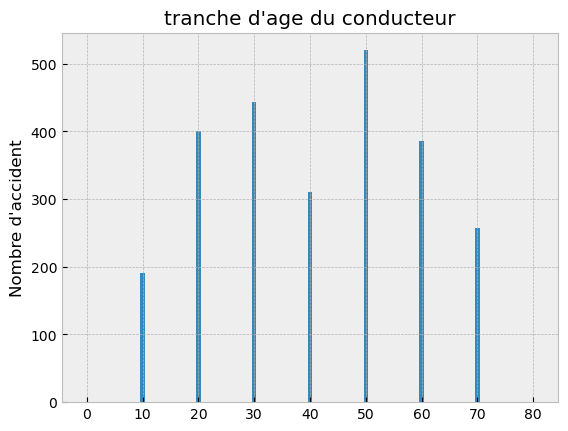

In [12]:
fig = plt.figure()
ax = plt.axes()

# récupération de tous les ages uniques dans le dataframe
ages = rapport['AGE_CONDUCTEUR'].unique()

# récupération du nombres d'accident par rapport aux ages
accidents_by_ages = []
for age in ages:
    accidents_by_ages.append(rapport['AGE_CONDUCTEUR'][age].sum())

# regroupement des ages par tranche de 10
age_groups = [0, 10, 20, 30, 40, 50, 60, 70, 80]
grouped_ages = np.digitize(ages, age_groups)

# addition du nombre d'accident en fonction des tranches d'age
grouped_accidents = []
for i in range(1, len(age_groups)):
    indices = np.where((grouped_ages == i) & (grouped_ages != 0))[0]
    grouped_accidents.append(np.sum(np.array(accidents_by_ages)[indices]))
# ajout d'une valeur dans la liste afin d'avoir les mêmes tailles
grouped_accidents.append(0)

# création du graphique
ax.bar(age_groups, grouped_accidents)
ax.set_ylabel("Nombre d'accident")
ax.set_title("tranche d'age du conducteur")

## Visualisation 2
Pourcentage d'accident par genre d'accident et par mois


### Commentaires
Le graphique présente de manière détaillée la répartition mensuelle des accidents en 2021 au Canda. 
Il catégorise les incidents en trois différents types : collisions, accidents sans collision, et accidents impliquant des objets fixes.
La colonne collision présente une collision avec un objet en mouvement (piéton, voiture, animal, objet projeté).
La colonne accident objet fixe présente elle un impact avec un objet fixe (lampadaire, arbre, panneau).
La colonne sans collision présente un accident sans collision ni impact avec un objet(feu, eau, renversement, explosion)
Ce graphique est très intéressant car il nous permet de nous rendre que à peu  près 5% des accident seulement sont sans collision.
Et que la plus grande partie des accident sont de type collision.

Ce graphique nous permet également de nous rendre de la tendance des accidents en 2021, on voit que les deux mois présentant le mois d'accident sont mars et avril qui sont a envions 6% et que les mois présentant le plus d'accident sont les mois de novembre de décembre environ 12%
Il y a donc le double d'accident en décembre que en Avril et peut être à cause des conditions climatiques défavorables


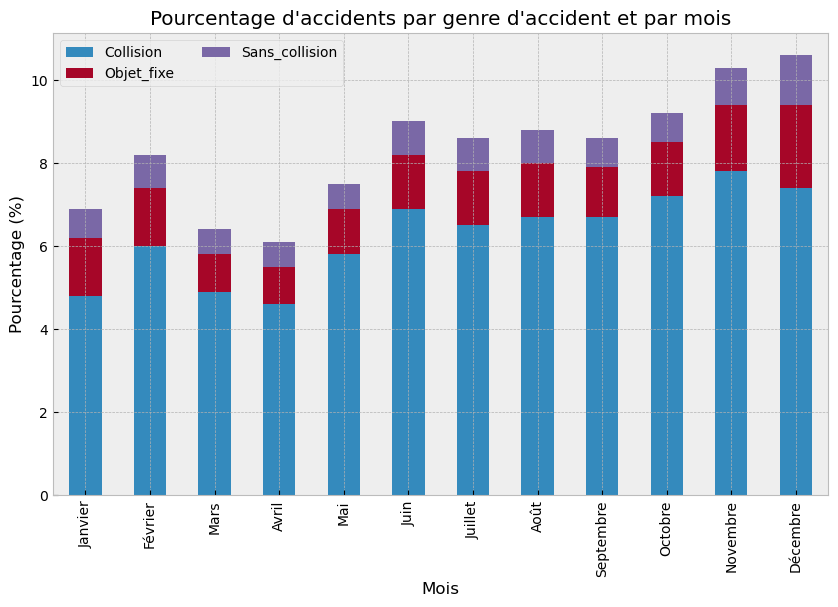

In [11]:
#récupération du dataframe de l'exercice 5
df = pd.DataFrame(agg_acc_genre)

# Supprimer la colonne 'Total' et la ligne 'Total'

df = df.drop('Total', axis=1)
df = df.drop('Total', axis=0)

# supression des % pour passer le contenu de mon dataframe en float
df = df.replace('%', '', regex=True).astype(float)
#récupération des mois de mon dataframe
mois_column = df.columns

# récupérer les valeurs pour chaque genre

collision_values = df.loc['Collision'].tolist()
objet_fixe_values = df.loc['Objet fixe'].tolist()
sans_collision_values = df.loc['Sans collision'].tolist()

# Créer un nouveau dictonnaire avec les valeurs récupérées

data = {
    'Mois': mois_column,
    'Collision': collision_values,
    'Objet_fixe': objet_fixe_values,
    'Sans_collision': sans_collision_values,
}

# Créer un nouveau dataframe avec le dictionnaire
df = pd.DataFrame(data)
df.set_index('Mois', inplace=True)

# Créer un créer un diagramme en bâtons groupés
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Mois")
plt.ylabel("Pourcentage (%)")
plt.title("Pourcentage d'accidents par genre d'accident et par mois")

plt.show()

## Visualisation 3

Pourcentage d'accident en fonction des jours de la semaine

### Commentaire
Nous avons choisis de faire un graphique présentant le taux d'accident de 2021 du Canada selon les jours de la semaine, car pendant la réalisation d'un exercice nous nous sommes aperçu d'une donnée intéressante.
La forte disparité du taux d'accident  entre la semaine et le week-end nous a interpelé.
En effet, on peut s'apercevoir que le nombre d'accident augmente toute la semaine  de manière plus au moins proportionnelle jusqu'à son point culminant le vendredi puis chute drastiquement le samedi et pour finir le dimanche qui est le jour avec le moins d'accident. 
On se rends compte que prêt de 17% des accidents se produisent le vendredi
et que seulement 5% des accidents se produisent le dimanche

80% des accidents se produisent la semaine et seulement 20% le week-end

On peut supposer que le pic d'accident le vendredi est dû à la fatigue de fin de semaine, à l'envie d'être en weekend ou aux départs pour le weekend

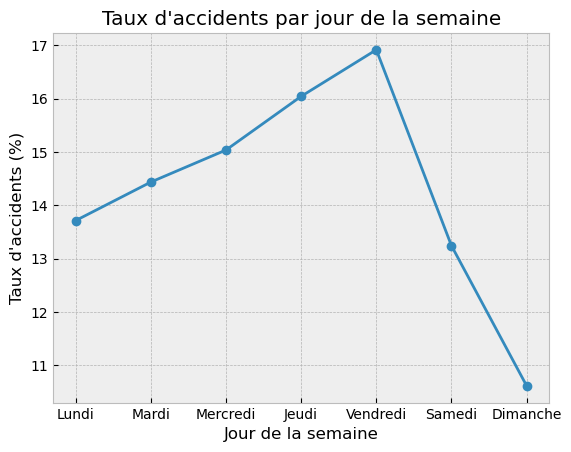

In [13]:
def calculer_taux_accidents_par_jour(dataframe):
    #choix de la colonne dt_acdn et mise au format datetime
    dataframe['DT_ACCDN'] = pd.to_datetime(dataframe['DT_ACCDN'])
    
    # Créez un dictionnaire pour les jours de la semaine
    mapping_jours = {
        0: 'Lundi',
        1: 'Mardi',
        2: 'Mercredi',
        3: 'Jeudi',
        4: 'Vendredi',
        5: 'Samedi',
        6: 'Dimanche'
    }
    
    # récupération du jour de la semaine et remplacement par  les noms en français
    jours_semaine = dataframe['DT_ACCDN'].dt.dayofweek.map(mapping_jours)
    
    # Compte du nombre d'accidents par jour
    occurrences_jours = jours_semaine.value_counts()
    
    # Calcul du taux d'accidents par jour
    taux_accidents_par_jour = (occurrences_jours / len(dataframe)) * 100
    
    # Normalisation des valeurs
    taux_accidents_par_jour = taux_accidents_par_jour * (100 / taux_accidents_par_jour.sum())
    
    # Tri des données par ordre des chronologique des jours
    jours_ordre = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
    taux_accidents_par_jour = taux_accidents_par_jour.reindex(jours_ordre)
    
    return taux_accidents_par_jour

taux_accidents = calculer_taux_accidents_par_jour(rapport)

# Créez un graphique de courbe
plt.plot(taux_accidents.index, taux_accidents.values, marker='o', linestyle='-')
plt.title('Taux d\'accidents par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Taux d\'accidents (%)')
plt.grid(True)
plt.show() 

## Visualisation 4

Nombre d'accident par mois et par genre du conducteur

### Commentaires
Sur 7 mois sur 12 on peut constater que les femmes font plus d'accident que les hommes.

Sur 4 mois sur 12 on peut constater que les hommes font plus d'accident que les femmes. 

Au mois de novembre, le nombre d'accident causé par les hommes et par les femmes est sensiblement le même.

On peut remarquer sur ce graphique que la différence du nombres d'accident n'est pas si grandes entre les hommes et les femmes. De plus les tendences ce suivent, le nombre d'accident augmentant pour les deux genres en fin d'année. 

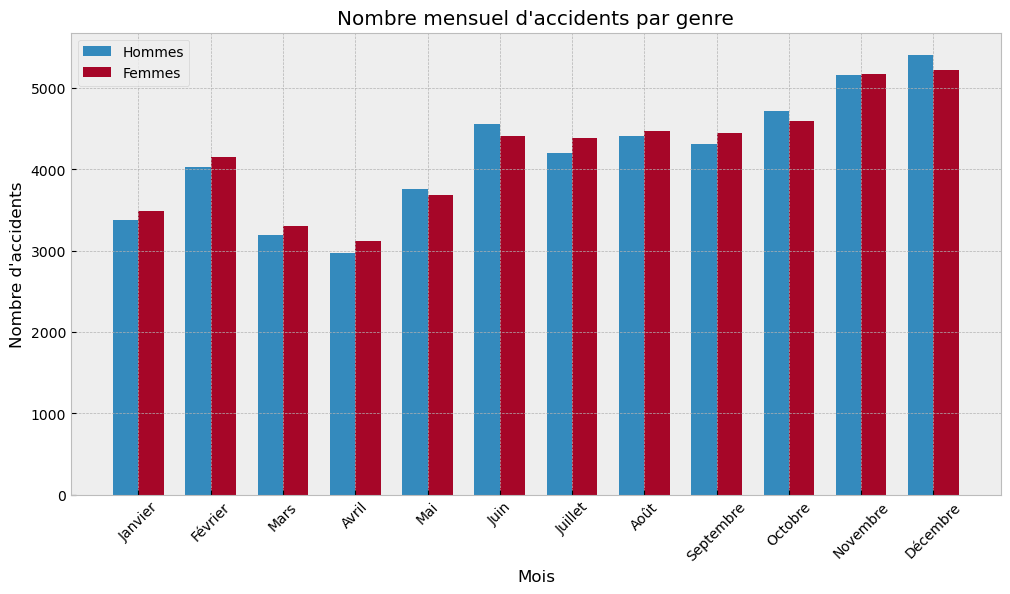

In [14]:
clean_mrc_mask = rapport['GENRE_CONDUCTEUR'].isna()
rapport = rapport.drop(rapport[clean_mrc_mask].index, axis=0)

# reation d'un dictionnaire pour la traduction des mois en français
anglais_francais_mois = {
    'January': 'Janvier',
    'February': 'Février',
    'March': 'Mars',
    'April': 'Avril',
    'May': 'Mai',
    'June': 'Juin',
    'July': 'Juillet',
    'August': 'Août',
    'September': 'Septembre',
    'October': 'Octobre',
    'November': 'Novembre',
    'December': 'Décembre'
}

#creation d'une liste me permettant de mettre les mois dans l'ordre chronologique

chrono_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# création de la colonne 'Mois'
rapport['Mois'] = pd.Categorical(rapport['DT_ACCDN'].dt.strftime('%B').map(anglais_francais_mois), categories=chrono_order)

# Filtrer les données par genre
male_data = rapport[rapport['GENRE_CONDUCTEUR'] == 'H']
female_data = rapport[rapport['GENRE_CONDUCTEUR'] == 'F']

# grouper par mois puis compter le nombre d'accidents
male_monthly_counts = male_data.groupby('Mois').size().reset_index(name='AccidentsHommes')
female_monthly_counts = female_data.groupby('Mois').size().reset_index(name='AccidentsFemmes')

# fusionner les deux DataFrames avec la colonne 'Mois'
merged_data = pd.merge(male_monthly_counts, female_monthly_counts, on='Mois', how='outer').fillna(0)

# trier le DataFrame
merged_data.sort_values('Mois', inplace=True)

#création du graphique
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(merged_data.index, merged_data['AccidentsHommes'], width=bar_width, label='Hommes')
plt.bar(merged_data.index + bar_width, merged_data['AccidentsFemmes'], width=bar_width, label='Femmes')
plt.xlabel('Mois')
plt.ylabel("Nombre d'accidents")
plt.title("Nombre mensuel d'accidents par genre")
plt.xticks(merged_data.index + bar_width / 2, merged_data['Mois'], rotation=45)
plt.legend()

plt.show()

## Visualisation 5
Nombres d'accident en fonction de la lumière du jour tous au long de l'année
L'axe à ordonnée représente le nombre total d'accidents dans l'année
L'axe des abscisse représente les mois de l'année

### Commentaires
La majorité des accidents se déroulent en journée éclairé.

Cette tendence est moin présente à partir du mois d'août (8) ou les accidents sont plus fréquent lorsque la luminosité se fait plus faible ou qu'il fait nuit. 
Cette tendence peut s'expliquer par le fait que le temps est moin beau et que la nuit tombe plus vite en hiver particulièrement en novembre - décembre qui est marque la fin de l'automne et le début de l'hiver.
On peut également expliqué le pic d'accident au mois de février (2) de la même manière, les conditions climatiques étant compliqué. 

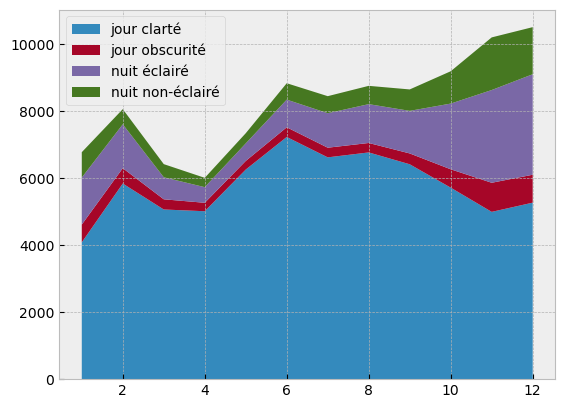

In [15]:
x = range(1, 13)

# reation d'un dictionnaire pour la traduction des mois en français
anglais_francais_mois = {
    'January': 'Janvier',
    'February': 'Février',
    'March': 'Mars',
    'April': 'Avril',
    'May': 'Mai',
    'June': 'Juin',
    'July': 'Juillet',
    'August': 'Août',
    'September': 'Septembre',
    'October': 'Octobre',
    'November': 'Novembre',
    'December': 'Décembre'
}

#creation d'une liste me permettant de mettre les mois dans l'ordre chronologique

chrono_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

rapport['Mois'] = pd.Categorical(rapport['DT_ACCDN'].dt.strftime('%B').map(anglais_francais_mois), categories=chrono_order)

accdn_jour_clarté = rapport[rapport['CD_ECLRM'] == 1]
accdn_jour_obsc = rapport[rapport['CD_ECLRM'] == 2]
accdn_nuit_eclr = rapport[rapport['CD_ECLRM'] == 3]
accdn_nuit_naneclr = rapport[rapport['CD_ECLRM'] == 4]

jour_c_monthly_counts = accdn_jour_clarté.groupby('Mois').size().reset_index(name='clarte')
jour_o_monthly_counts = accdn_jour_obsc.groupby('Mois').size().reset_index(name='obscurite')
nuit_nc_monthly_counts = accdn_nuit_eclr.groupby('Mois').size().reset_index(name='nuit_claire')
nuit_nn_monthly_counts = accdn_nuit_naneclr.groupby('Mois').size().reset_index(name='nuit_sombre')

A = jour_c_monthly_counts['clarte'].tolist()
B = jour_o_monthly_counts['obscurite'].tolist()
C = nuit_nc_monthly_counts['nuit_claire'].tolist()
D = nuit_nn_monthly_counts['nuit_sombre'].tolist()

#merged_data = pd.merge(male_monthly_counts, female_monthly_counts, on='Mois', how='outer').fillna(0)
plt.stackplot(x, A, B, C, D ,labels=['jour clarté','jour obscurité','nuit éclairé', 'nuit non-éclairé'])
plt.legend(loc='upper left')